# Analysis in Medicare Provider Utilization and Payment Data: From the Prospectives of Average Difference between Submitted and Charged Medicare Amount from Physician in California

## Data Input

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("medical_insurance.csv", index_col = 'National Provider Identifier')
data.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
National Provider Identifier,,,,,,,,,,,,,,,,,,,,,
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99217,Hospital observation care discharge,N,23.0,23.0,23.0,72.680000,328.000000,54.502609,55.280870
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99219,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99221,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99222,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621
1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,...,99223,"Initial hospital inpatient care, typically 70 ...",N,220.0,215.0,220.0,205.185955,631.186364,157.908955,160.930409


In [3]:
display(data.info())
display(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9497892 entries, 1003000126 to 1861590176
Data columns (total 25 columns):
Last Name/Organization Name of the Provider                 object
First Name of the Provider                                  object
Middle Initial of the Provider                              object
Credentials of the Provider                                 object
Gender of the Provider                                      object
Entity Type of the Provider                                 object
Street Address 1 of the Provider                            object
Street Address 2 of the Provider                            object
City of the Provider                                        object
Zip Code of the Provider                                    object
State Code of the Provider                                  object
Country Code of the Provider                                object
Provider Type                                               object
Medi

None

(9497892, 25)

In [4]:
data.isnull().sum()

Last Name/Organization Name of the Provider                     145
First Name of the Provider                                   423916
Middle Initial of the Provider                              2630743
Credentials of the Provider                                  637367
Gender of the Provider                                       423842
Entity Type of the Provider                                       1
Street Address 1 of the Provider                                  1
Street Address 2 of the Provider                            5292992
City of the Provider                                              4
Zip Code of the Provider                                          1
State Code of the Provider                                        1
Country Code of the Provider                                      1
Provider Type                                                     1
Medicare Participation Indicator                                  1
Place of Service                                

There are many NaNs in several columns, I will process them later. Let's only focus samples from Californa. 

## Exploratory Data Analysis

In [5]:
# subset dataset to only Californa data
data_ca = data.loc[data['State Code of the Provider']=='CA']
display(data_ca.shape)

(731564, 25)

We can see that number of samples are reduced from 9+ millions to 700 thousands. Let's start to dive more into the dataset

In [6]:
data_ca_drop = data_ca.drop(['Middle Initial of the Provider', 'First Name of the Provider','Credentials of the Provider','Street Address 2 of the Provider','State Code of the Provider','Country Code of the Provider'], axis=1)

In [7]:
data_ca_drop.isnull().sum()

Last Name/Organization Name of the Provider                    27
Gender of the Provider                                      40464
Entity Type of the Provider                                     0
Street Address 1 of the Provider                                0
City of the Provider                                            0
Zip Code of the Provider                                        0
Provider Type                                                   0
Medicare Participation Indicator                                0
Place of Service                                                0
HCPCS Code                                                      0
HCPCS Description                                               0
HCPCS Drug Indicator                                            0
Number of Services                                              0
Number of Medicare Beneficiaries                                0
Number of Distinct Medicare Beneficiary/Per Day Services        0
Average Me

So we notice that there are 40464 missing values in Gender, lets' dip more information about the gender column

In [8]:
print (data_ca_drop['Gender of the Provider'].describe())


count     691100
unique         2
top            M
freq      515106
Name: Gender of the Provider, dtype: object


we can see that gender in male acounts for almost 74% of the data. It can be inferred from the fact that generally there are more male physicians (provider) than female physicians. The missing value in column "Last Name/Organization Name of the Provider" and "Gender of the Provider" account for less than 20% of the data, let's ignore the rows that missing with gender first. 

In [9]:
data_ca_drop = data_ca_drop.dropna()
data_ca_drop.isnull().sum()

Last Name/Organization Name of the Provider                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Description                                           0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average 

Now we don't have any missing value in the dataframe, let's look at more details in this data. First, let's create a column to show the difference between "Avergae submitted Charged Amount" and "Average Medicare Allowed Amount"

In [10]:
data_ca_drop['Average Medicare Difference'] = data_ca_drop['Average Submitted Charge Amount']- data_ca_drop['Average Medicare Allowed Amount'] 

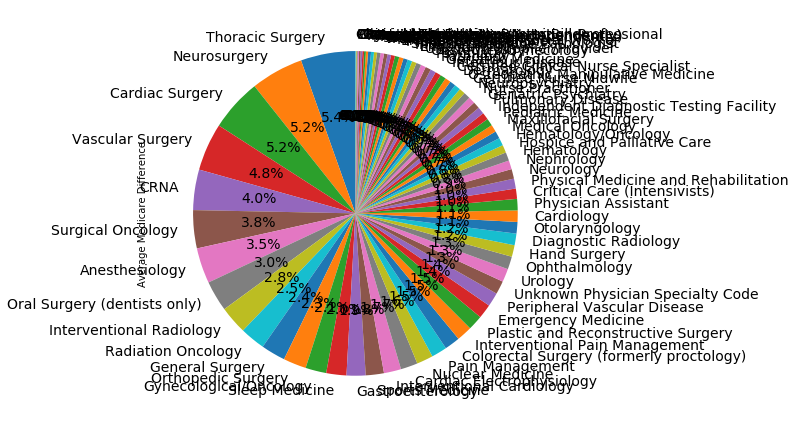

In [11]:
data_pt_amaa = data_ca_drop.groupby('Provider Type')['Average Medicare Difference'].mean().reset_index().sort_values('Average Medicare Difference', ascending = False)
plt.figure(figsize=(16,8))
# plot pie chart
ax1 = plt.subplot(121, aspect='equal')
data_pt_amaa.plot(kind='pie', y = 'Average Medicare Difference', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=data_pt_amaa['Provider Type'], legend = False, fontsize=14)
plt.show()

Based on the pie chart, there are many provider types, let's focus on the top 5 provider types that have the most average medicare difference. 

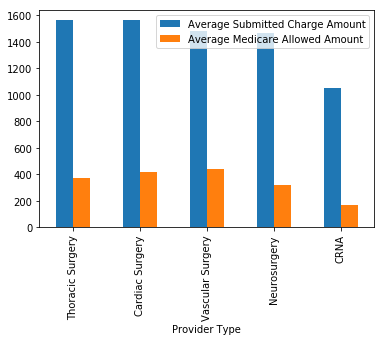

In [12]:
provider_list = ['Thoracic Surgery','Neurosurgery','Cardiac Surgery', 'Vascular Surgery', 'CRNA']
data_ca_drop_pro = data_ca_drop.loc[data_ca_drop['Provider Type'].isin(provider_list)]

# group by provider type and plot bar plot
data_ca_drop_pro.groupby('Provider Type')['Average Submitted Charge Amount','Average Medicare Allowed Amount'].mean().sort_values(by = 'Average Submitted Charge Amount', ascending = False).plot(kind = 'bar')



Let's see the actual average medicare amount in top 5 provider type:

In [13]:
data_ca_drop_pro.groupby('Provider Type')['Average Medicare Difference'].mean().sort_values(ascending = False)

Provider Type
Thoracic Surgery    1192.946294
Neurosurgery        1149.126776
Cardiac Surgery     1146.053486
Vascular Surgery    1042.064660
CRNA                 882.815789
Name: Average Medicare Difference, dtype: float64

We may also curious about what would average medicare difference varies among cities, here, we extract top 5 cities that have most average medicare difference:

City of the Provider
WEST HILLS        4544.530351
WILLITS           4189.692122
MARINA DEL REY    3933.719806
INGLEWOOD         3641.784906
LOS ALTOS         3608.698382
Name: Average Medicare Difference, dtype: float64

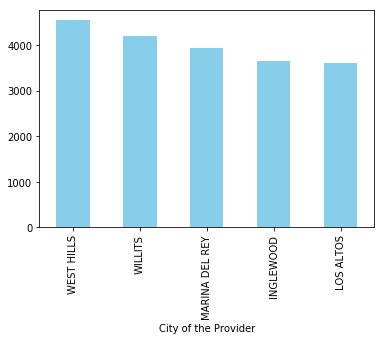

In [14]:
data_ca_drop_pro.groupby('City of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False).head(5).plot(kind = 'bar', color = 'skyblue')
data_ca_drop_pro.groupby('City of the Provider')['Average Medicare Difference'].mean().sort_values(ascending = False).head(5)

We can see that West Hills has the most difference in average medicare amount, with around $4500 Now, let's subset dataframe based on top 5 provider types.

In [15]:
#subset dataframe based on provider type
data_crna = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='CRNA']
data_vas = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Vascular Surgery']
data_cardiac = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Cardiac Surgery']
data_thora = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Thoracic Surgery']
data_neuro = data_ca_drop_pro.loc[data_ca_drop_pro['Provider Type']=='Neurosurgery']

### Top 10 Procedures in CRNA

HCPCS Description
Anesthesia for procedure on heart and great blood vessels on heart-lung machine, age 1 year or older, or re-operation more than 1 month after original procedure    5002.128809
Anesthesia for heart artery bypass grafting on heart-lung machine                                                                                                   4772.314838
Anesthesia for kidney transplant                                                                                                                                    4252.883077
Anesthesia for procedure on spine and spinal cord                                                                                                                   3170.178024
Anesthesia for procedure on heart and great blood vessels                                                                                                           3118.022305
Anesthesia for removal of prostate                                                                    

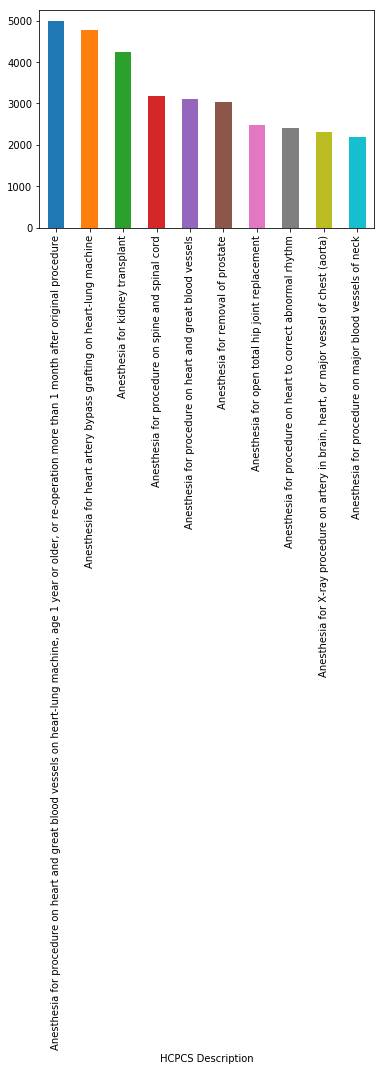

In [16]:
data_crna.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_crna.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

It seems that anesthesia for procedures on hear and great blood vessel cost has the most differences in average medicare amount, which is around $5000 USD. The procedure includes heart-lung usage, re-operation after original procedures. Further details about the frequency of these re-operating procedures and risk factors that contirbute to the re-operation can be discussed. But these questions will be left opened in the project.

### Top 10 Vascular Surgery

HCPCS Description
Removal of plaque and insertion of stents into artery in one leg, endovascular, accessed through the skin or open procedure       23740.022667
Removal of plaque and insertion of stents into arteries in one leg, endovascular, accessed through the skin or open procedure     19768.319407
Removal of plaque in arteries in one leg, endovascular, accessed through the skin or open procedure                               17688.368755
Removal of plaque in artery in one leg, endovascular, accessed through the skin or open procedure                                 14947.196645
Repair of defect of aorta in chest                                                                                                 9370.670909
Balloon dilation of artery of one leg, endovascular, accessed through the skin or open procedure                                   8738.647956
Removal of blood clot and injections (accessed through the skin) to dissolve blood clot from veins using fluoroscopic guidan

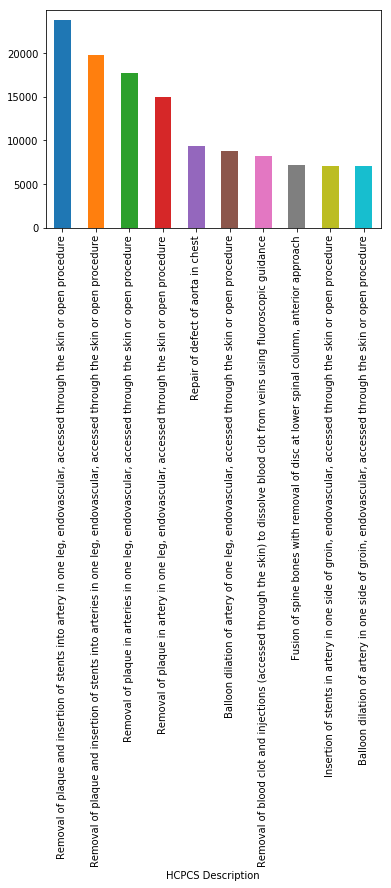

In [17]:
data_vas.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_vas.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

It seems that cost in removal of plaque and insection of stents into artery has the most differences in average medicare amount, which is $23700 USD, followed by the procedures involving removal of plaque and insection of stents into arteriers. We can see that removel of plaque and insection of stents account for top 4 average medicare amount difference procedures in Vascular Surgery. 

### Top 10 Cardiac Surgery 

HCPCS Description
Insertion of vena cava filter by endovascular approach, including radiological supervision and interpretation    30757.930833
Insertion of stents in artery in one side of groin, endovascular, accessed through the skin or open procedure    17229.114615
Heart surgery procedure                                                                                          16159.088667
Transplantation of donor heart                                                                                   14659.190000
Complete removal of inside lining of chest cavity and lung using an endoscope                                     7801.992500
Repair of hole between upper heart chambers on heart-lung machine                                                 7540.277238
Insertion of lower heart chamber blood flow assist device                                                         7303.768788
Replacement of valve between left upper and lower chambers on heart-lung machine                    

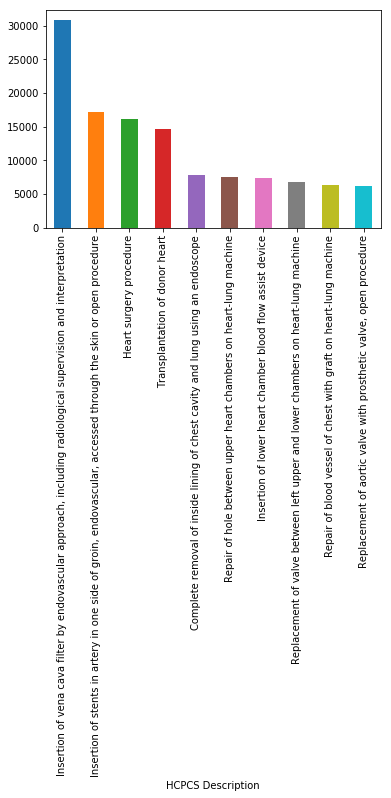

In [18]:
data_cardiac.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_cardiac.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The bar chart shows that insection of vena cava by endovascular approach has the most difference in average medicare amount in cardiac surgery, which is $30700 USD.

### Top 10 Thoracic Surgery 

HCPCS Description
Heart surgery procedure                                                                                                                          17248.377187
Insertion of intravascular stents in vein, open or accessed through the skin, with radiological supervision and interpretation                   12753.594117
Removal of foreign body from lining of chest cavity using an endoscope                                                                           10403.839235
Placement of graft to aorta on heart-lung machine                                                                                                 9683.436511
Occlusion of venous malformations (other than hemorrhage) with radiological supervision and interpretation, roadmapping, and imaging guidance     9681.330000
Partial removal of lower esophagus                                                                                                                8841.641538
Replacement of aortic valve with p

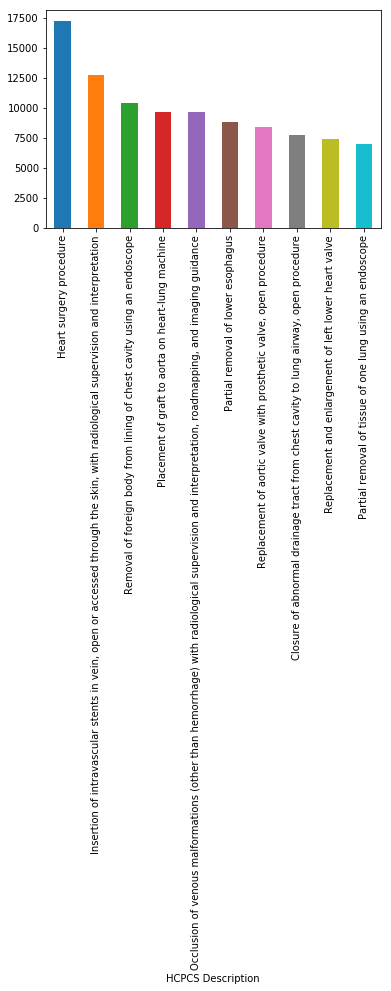

In [19]:
data_thora.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_thora.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The procedures that involves heart surgery shows the most difference between submitted charged amount and allowed medicare amount, which is around $17200 USD. 

### Top 10 Neurosurgery

HCPCS Description
Repair of bulging of blood vessel (aneurysm) in brain                                                                                               11521.145454
Removal of middle spine bone and growth                                                                                                             10031.506923
Removal of blood clot and injections to dissolve blood clot from artery or arterial graft using fluoroscopic guidance, accessed through the skin     9610.130833
Excision of skull base for exploration or release of cranial nerves                                                                                  8217.257069
Implantation of brain neurostimulator electrodes microelectrode recording                                                                            8025.686634
Removal of pituitary gland tumor using an endoscope                                                                                                  7914.086006
Reshaping of sku

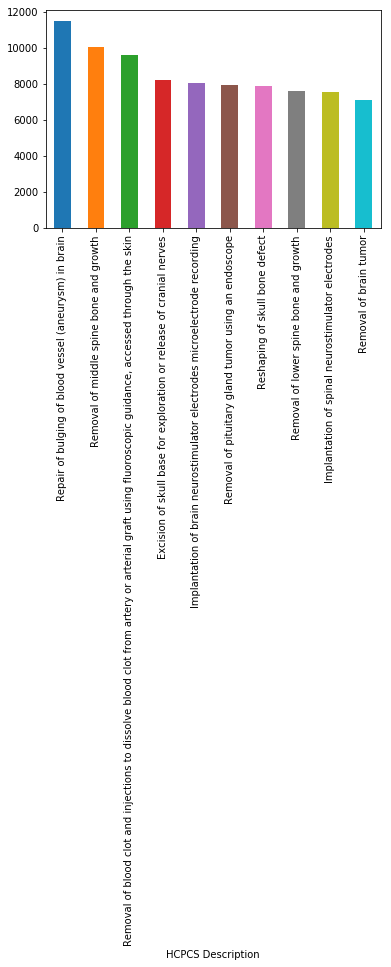

In [20]:
data_neuro.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10).plot(kind ="bar")
data_neuro.groupby('HCPCS Description')['Average Medicare Difference'].mean().sort_values(ascending = False).head(10)

The largest difference in neruosurgery is the procedure of repairing of bulging of blood vessel in brain, which is around 11520 USD.

### Creating Dummy Variables

Now, I want to know that what factors would affect the average submitted charge amount. To do so, I need to get dummies for each categorical value to save space and ease computatinal complexity. 

In [21]:
# convert categorical variable to dummy variable
data_ca_drop_dummy = pd.get_dummies(data_ca_drop_pro[['Zip Code of the Provider','Entity Type of the Provider','Provider Type','Medicare Participation Indicator','HCPCS Description','HCPCS Drug Indicator','City of the Provider']])

In [68]:
# build continuous variable dataframe
data_ca_drop_continue = data_ca_drop_pro[['Number of Services','Number of Medicare Beneficiaries','Number of Distinct Medicare Beneficiary/Per Day Services','Average Medicare Payment Amount','Average Medicare Standardized Amount','Average Medicare Difference']]

In [31]:
# normalize continuous dataframe
data_ca_drop_continue = (data_ca_drop_continue-data_ca_drop_continue.min())/(data_ca_drop_continue.max()-data_ca_drop_continue.min())

In [33]:
"""
import numpy as np

#log transformation 
data_ca_drop_continue.apply(lamda x: , axis = 0).hist(bins=50, figsize=(16, 12))
"""

'\nimport numpy as np\n\n#log transformation \ndata_ca_drop_continue.apply(lamda x: , axis = 0).hist(bins=50, figsize=(16, 12))\n'

In [69]:
# concat binary dataframe and continuous dataframe
data_ca_drop_dummy = pd.concat([data_ca_drop_continue,data_ca_drop_dummy], axis = 1)

In [70]:
from sklearn.preprocessing import StandardScaler
# run lineaqr regression model
Y = data_ca_drop_dummy['Average Medicare Difference']
X = data_ca_drop_dummy.drop(['Average Medicare Difference'], axis = 1)

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Building a Linear Regression Model

In [73]:
print(X.shape)
print(Y.shape)

(11475, 2292)
(11475, 2)


In [77]:
"""
import statsmodels.formula.api as sm

model = sm.OLS(endog = Y, exog = X.astype(float))
results = model.fit()
print (results.summary())
"""

'\nimport statsmodels.formula.api as sm\n\nmodel = sm.OLS(endog = Y, exog = X.astype(float))\nresults = model.fit()\nprint (results.summary())\n'

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()

# train model
lm.fit(x_train, y_train)

# Predict
y_pred = lm.predict(x_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1167.1856174685556


Text(0,0.5,'Predictions')

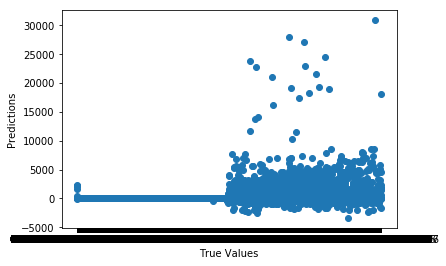

In [76]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

## Lasso Regression

The result from linear regression showed that there's multicollinearity issue. I will use Lasso Regression to reduce the issue. 

In [78]:
#A helper method for pretty-printing linear models
def get_feature_coef(coefs, names = None):
    
    feature_importance = zip(coefs, names)
    feature_importance = sorted(feature_importance,  key = lambda x:-np.abs(x[0]))
    sig_feature = [(coef, name) for coef, name in feature_importance if coef != 0]
    
    return sig_feature

In [83]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Instantiate a lasso regressor
lasso = Lasso()

#lasso alpha parameters
lasso_params = {'alpha':[0.001, 0.01, 0.1, 0.5]} 

lasso_grid = GridSearchCV(lasso, lasso_params, cv = 10, verbose = 10, scoring = 'neg_mean_absolute_error')

# train lasso regressor 
lm_lasso = lasso_grid.fit(x_train, y_train)

print (lm_lasso.best_params_)
"""
# predict 
y_pred_lasso = lm_lasso.predict(x_test)

# lasso regressor RMSE 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
"""

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] alpha=0.001 .....................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.001, score=-349.3694691602885, total=  54.9s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.1s remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ........... alpha=0.001, score=-343.40937783545473, total=  52.8s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ........... alpha=0.001, score=-333.33911830347654, total=  39.3s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.001, score=-404.0637105045761, total=  50.5s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.3min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.001, score=-380.0418847938755, total=  37.7s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.9min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ........... alpha=0.001, score=-346.31546196075186, total=  39.0s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.6min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.001, score=-333.5731254188661, total=  38.2s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  5.2min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.001, score=-388.0752563016235, total=  40.1s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.9min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.001, score=-370.0889184087319, total=  51.5s
[CV] alpha=0.001 .....................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.8min remaining:    0.0s
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ........... alpha=0.001, score=-380.31213739205555, total=  51.1s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.01, score=-345.51123672274696, total=  38.8s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.01, score=-339.0467460470862, total=  37.3s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.01, score=-329.96487628830454, total=  38.1s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.01, score=-400.2373652913886, total=  42.2s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.01, score=-375.9781438816549, total=  37.2s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.01, score=-342.1134172594402, total=  42.3s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.01, score=-330.8493211386143, total=  45.4s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.01, score=-385.07644064130056, total=  47.3s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.01, score=-366.52871862961405, total=  53.8s
[CV] alpha=0.01 ......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............ alpha=0.01, score=-376.55353045418775, total=  41.4s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.1, score=-337.71195076051333, total=  38.4s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............... alpha=0.1, score=-320.214276180002, total=  32.2s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .............. alpha=0.1, score=-315.0541963981571, total=  36.2s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .............. alpha=0.1, score=-382.2328746442145, total=  34.3s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............... alpha=0.1, score=-362.338156719675, total=  35.6s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.1, score=-323.69194860861217, total=  31.5s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .............. alpha=0.1, score=-319.5186953494428, total=  34.0s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.1, score=-369.23491447618255, total=  33.6s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.1, score=-352.50904901804546, total=  41.7s
[CV] alpha=0.1 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.1, score=-364.50045173443937, total=  42.4s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-334.60716253769385, total=  37.1s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .............. alpha=0.5, score=-302.5965471052972, total=  35.9s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] .............. alpha=0.5, score=-301.9678272652154, total=  40.7s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-357.78032852941806, total=  44.4s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-353.79182499410314, total=  34.9s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-302.87931108952387, total=  42.0s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-308.26849107379394, total=  41.5s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-352.48848956267085, total=  32.7s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-340.27122882766395, total=  43.6s
[CV] alpha=0.5 .......................................................


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] ............. alpha=0.5, score=-360.89502568375934, total=  37.6s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 27.3min finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


{'alpha': 0.5}


'\n# predict \ny_pred_lasso = lm_lasso.predict(x_test)\n\n# lasso regressor RMSE \nprint(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))\n'

Based on the 10-fold cross validation, alpha = 0.5 generate the optimal lasso regressor, so we will use this parameter to build a lasso regressor

In [87]:
#optimal lasso regressor
lasso = Lasso(alpha = 0.5)

# train lasso regressor 
lm_lasso_opt = lasso.fit(x_train, y_train)

# predict 
y_pred_lasso = lm_lasso_opt.predict(x_test)

# lasso regressor RMSE 
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1182.5026444465043


Text(0,0.5,'Predictions')

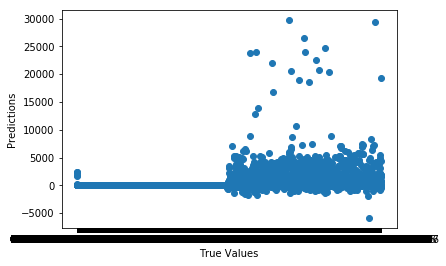

In [88]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [65]:
# get lasso regressor coefficient 
lasso_coef = lm_lasso.coef_
print (get_feature_coef(lasso_coef, x_train.columns))
print (lasso_coef)
print (lm_lasso.score(x_train,y_train))

[]
[-0. -0. -0. ...  0. -0. -0.]
0.0


The result shows that heart surgery, vascular procedure, and providers in zipcode 93291 and zipcode 90048 have the most correlation to average medicare difference. One thing to be noted is that adjusted R-square did not improved after conducting lasso regression. 

# Random Forest Training and Prediction

In [98]:
from sklearn.ensemble import RandomForestRegressor

# random forest model
rf = RandomForestRegressor(n_estimators = 200, min_samples_leaf = 2, min_samples_split = 15)

# train random forest regressor
rf_model = rf.fit(x_train, y_train)

# Use the forest's predict method on the test data
y_pred_rf = rf.predict(x_test)

# lasso regressor RMSE 
print(mean(np.sqrt(y_test, y_pred_rf)))

# Calculate the absolute errors
errors = abs(y_pred_rf - y_test)

# Print out the mean absolute error
print('Mean Absolute Error:', '$',round(np.mean(errors), 2))

NameError: name 'mean' is not defined

# Gradient Boosting Machine

In [ ]:
from xgboost import XGBRegressor
